In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


##### 어느 도시에서 몇 건의 사건이 발생했는지 상위 10개 도시의 발생건수를 bar chart로 표현

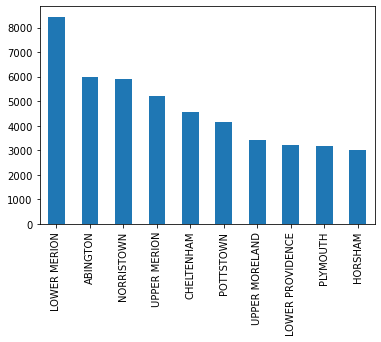

In [20]:
df.twp.value_counts().head(10).plot(kind = 'bar')

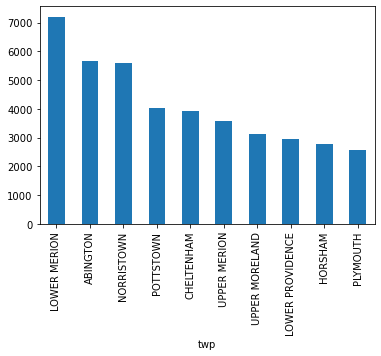

In [22]:
#2
df.groupby('twp')['zip'].count().sort_values(ascending = False)[:10].plot(kind = 'bar')

##### 사고유형별 갯수를 bar chart

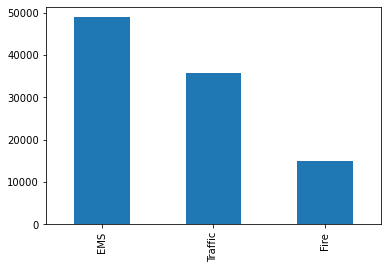

In [38]:
df.title.apply(lambda x : x.split(':')[0]).value_counts().plot(kind = 'bar')

##### 월별 사건 발생 추이를 line chart로 표시하시오

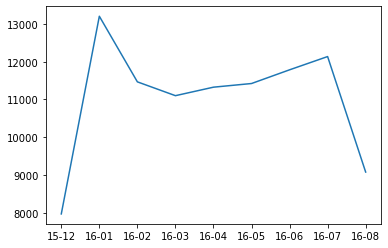

In [61]:
df['timeStamp'].apply(lambda x : x[2:7]).value_counts().sort_index().plot()     # index기준으로 정렬 : sort_index()

In [58]:
df.timeStamp[2][2:7]

'15-12'

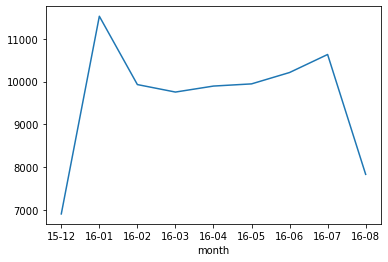

In [65]:
#2
df['month'] = df['timeStamp'].apply(lambda x : x[2:7])
df.groupby('month')['zip'].count().plot()

##### 각 월기준 어느 유형의 사건이 많이 일어나는지

In [122]:
df['type'] = df.title.apply(lambda x : x.split(':')[0])
df.groupby('month')['type'].value_counts().unstack()    # unstack()   복습필요

type,EMS,Fire,Traffic
month,,,
15-12,3898,1096,2975
16-01,6063,1905,5237
16-02,5413,1869,4185
16-03,5832,1590,3679
16-04,5680,1717,3929
16-05,5734,1573,4116
16-06,5720,1796,4270
16-07,6029,1901,4207
16-08,4508,1473,3097


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   month      99492 non-null  object 
 10  type       99492 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.3+ MB


In [121]:
# 값이 다르게 나옴
df.groupby(['month','type'])['lat'].count()

month  type   
15-12  EMS        3898
       Fire       1096
       Traffic    2975
16-01  EMS        6063
       Fire       1905
       Traffic    5237
16-02  EMS        5413
       Fire       1869
       Traffic    4185
16-03  EMS        5832
       Fire       1590
       Traffic    3679
16-04  EMS        5680
       Fire       1717
       Traffic    3929
16-05  EMS        5734
       Fire       1573
       Traffic    4116
16-06  EMS        5720
       Fire       1796
       Traffic    4270
16-07  EMS        6029
       Fire       1901
       Traffic    4207
16-08  EMS        4508
       Fire       1473
       Traffic    3097
Name: lat, dtype: int64

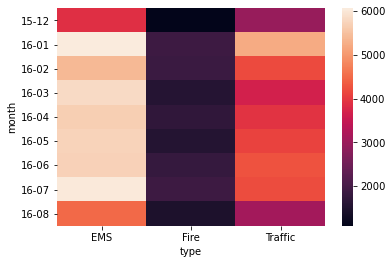

In [116]:
sns.heatmap(df.groupby('month')['type'].value_counts().unstack())